In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import squarify
import seaborn as sns
plt.style.use('fivethirtyeight')

In [2]:
dataset = pd.read_excel('G:/4-1 Thesis/fiverr_thesis.xlsx')

In [3]:
dataset.head()

,fiverr_profile,Category,Subcategory,Pricing,Sales,Stars
0,aaimran,"Data,Business","Data Processing,Data Entry,E-Commerce Management","10,10,10","15,242,1","4.9,4.9,5"
1,aaliyaan,"Programming & Tech,Digital Marketing","E-Commerce Development,WordPress,Video Marketi...","145,45,30,20,20,145","1,331,129,560,516,3","5,5,4.9,4.9,4.9,5"
2,abantikabose,"Digital Marketing,Writing & Translation","Book & eBook Marketing,Book & eBook Writing,Bo...","25,30,10,50","162,79,334,29","5,4.9,5,5"
3,abdelhamid19,Digital Marketing,"Web Analytics,Web Traffic","100,70","3,74","5,5"
4,abidhussain1918,"Digital Marketing,Data,Business","Influencer Marketing,Data Processing,Data Entr...","5,10,10,10","1,16,73,2","5,4.9,4.9,5"


In [4]:
dataset['Category'].isnull().sum()

0

In [5]:
print(dataset.shape)
#print(dataset.columns) 
#print(dataset.head(10))
#print(dataset.describe())


(1500, 6)


# Category Part

In [6]:
column_list_category = []
for index, rows in dataset.iterrows():
    my_string = rows.Category
    my_list = my_string.split(",")
    column_list_category.append(my_list)
#print(column_list_category)

In [7]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
tran_encod = TransactionEncoder()
tran_encod_list = tran_encod.fit(column_list_category).transform(column_list_category)
transaction_df_cat = pd.DataFrame(tran_encod_list, columns=tran_encod.columns_)
transaction_df_cat.head()

,Business,Data,Digital Marketing,Graphics & Design,Lifestyle,Music & Audio,Programming & Tech,Video & Animation,Writing & Translation
0,True,True,False,False,False,False,False,False,False
1,False,False,True,False,False,False,True,False,False
2,False,False,True,False,False,False,False,False,True
3,False,False,True,False,False,False,False,False,False
4,True,True,True,False,False,False,False,False,False


In [8]:
item_count = {}
for col in transaction_df_cat.columns:
    item_count[col] = transaction_df_cat[col].sum()
item_freq_df_cat = pd.DataFrame(data=list(item_count.values()), index=list(item_count.keys()), columns=['frequency']).sort_values(by='frequency', ascending=False)
item_freq_df_cat.shape, item_freq_df_cat.head(9)

((9, 1),
                        frequency
 Programming & Tech           585
 Digital Marketing            561
 Graphics & Design            558
 Writing & Translation        327
 Data                         261
 Business                     231
 Video & Animation            216
 Music & Audio                 69
 Lifestyle                     36)

(array([  0., 100., 200., 300., 400., 500., 600., 700.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

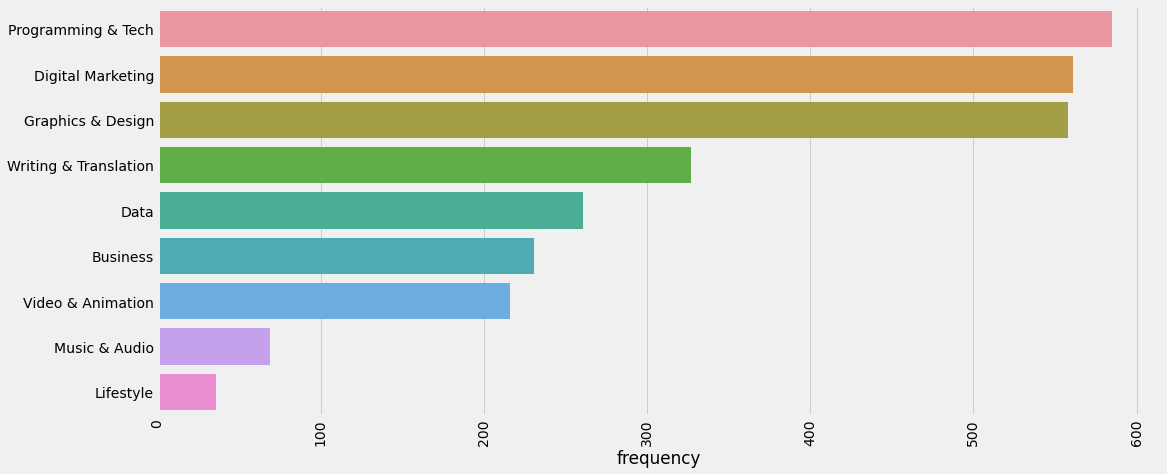

In [9]:
plt.figure(figsize=(16,7))
sns.barplot(y=item_freq_df_cat.index[:9], x=item_freq_df_cat.frequency[:9])
plt.xticks(rotation=90)

In [10]:
apriori(transaction_df_cat, min_support=0.1, use_colnames=True)

,support,itemsets
0,0.154,(Business)
1,0.174,(Data)
2,0.374,(Digital Marketing)
3,0.372,(Graphics & Design)
4,0.390,(Programming & Tech)
5,0.144,(Video & Animation)
6,0.218,(Writing & Translation)
7,0.146,"(Programming & Tech, Digital Marketing)"
8,0.110,"(Digital Marketing, Writing & Translation)"
9,0.108,"(Programming & Tech, Graphics & Design)"


In [11]:
#print(f'freq>30: {item_freq_df_cat[item_freq_df_cat.frequency>30].shape[0]} items')
#print(f'freq>20: {item_freq_df_cat[item_freq_df_cat.frequency>20].shape[0]} items')
#print(f'freq>12: {item_freq_df_cat[item_freq_df_cat.frequency>12].shape[0]} items')

In [12]:
freq_itemset_support = apriori(transaction_df_cat, min_support=0.024, use_colnames=True)
freq_itemset_support

,support,itemsets
0,0.154,(Business)
1,0.174,(Data)
2,0.374,(Digital Marketing)
3,0.372,(Graphics & Design)
4,0.024,(Lifestyle)
5,0.046,(Music & Audio)
6,0.390,(Programming & Tech)
7,0.144,(Video & Animation)
8,0.218,(Writing & Translation)
9,0.066,"(Business, Data)"


In [13]:
overal_association_rules = association_rules(freq_itemset_support, metric="confidence", min_threshold=0.50)
overal_association_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Data),(Programming & Tech),0.174,0.390,0.088,0.505747,1.296788,0.020140,1.234186
1,(Writing & Translation),(Digital Marketing),0.218,0.374,0.110,0.504587,1.349164,0.028468,1.263593
2,(Video & Animation),(Graphics & Design),0.144,0.372,0.076,0.527778,1.418757,0.022432,1.329882
3,"(Business, Programming & Tech)",(Data),0.054,0.174,0.028,0.518519,2.979991,0.018604,1.715538
4,"(Business, Writing & Translation)",(Digital Marketing),0.052,0.374,0.032,0.615385,1.645413,0.012552,1.627600
5,"(Graphics & Design, Writing & Translation)",(Digital Marketing),0.052,0.374,0.030,0.576923,1.542575,0.010552,1.479636
6,"(Programming & Tech, Writing & Translation)",(Digital Marketing),0.058,0.374,0.034,0.586207,1.567398,0.012308,1.512833


In [14]:
#overal_association_rules = association_rules(freq_itemset_support, metric="lift", min_threshold=1.0)
#overal_association_rules

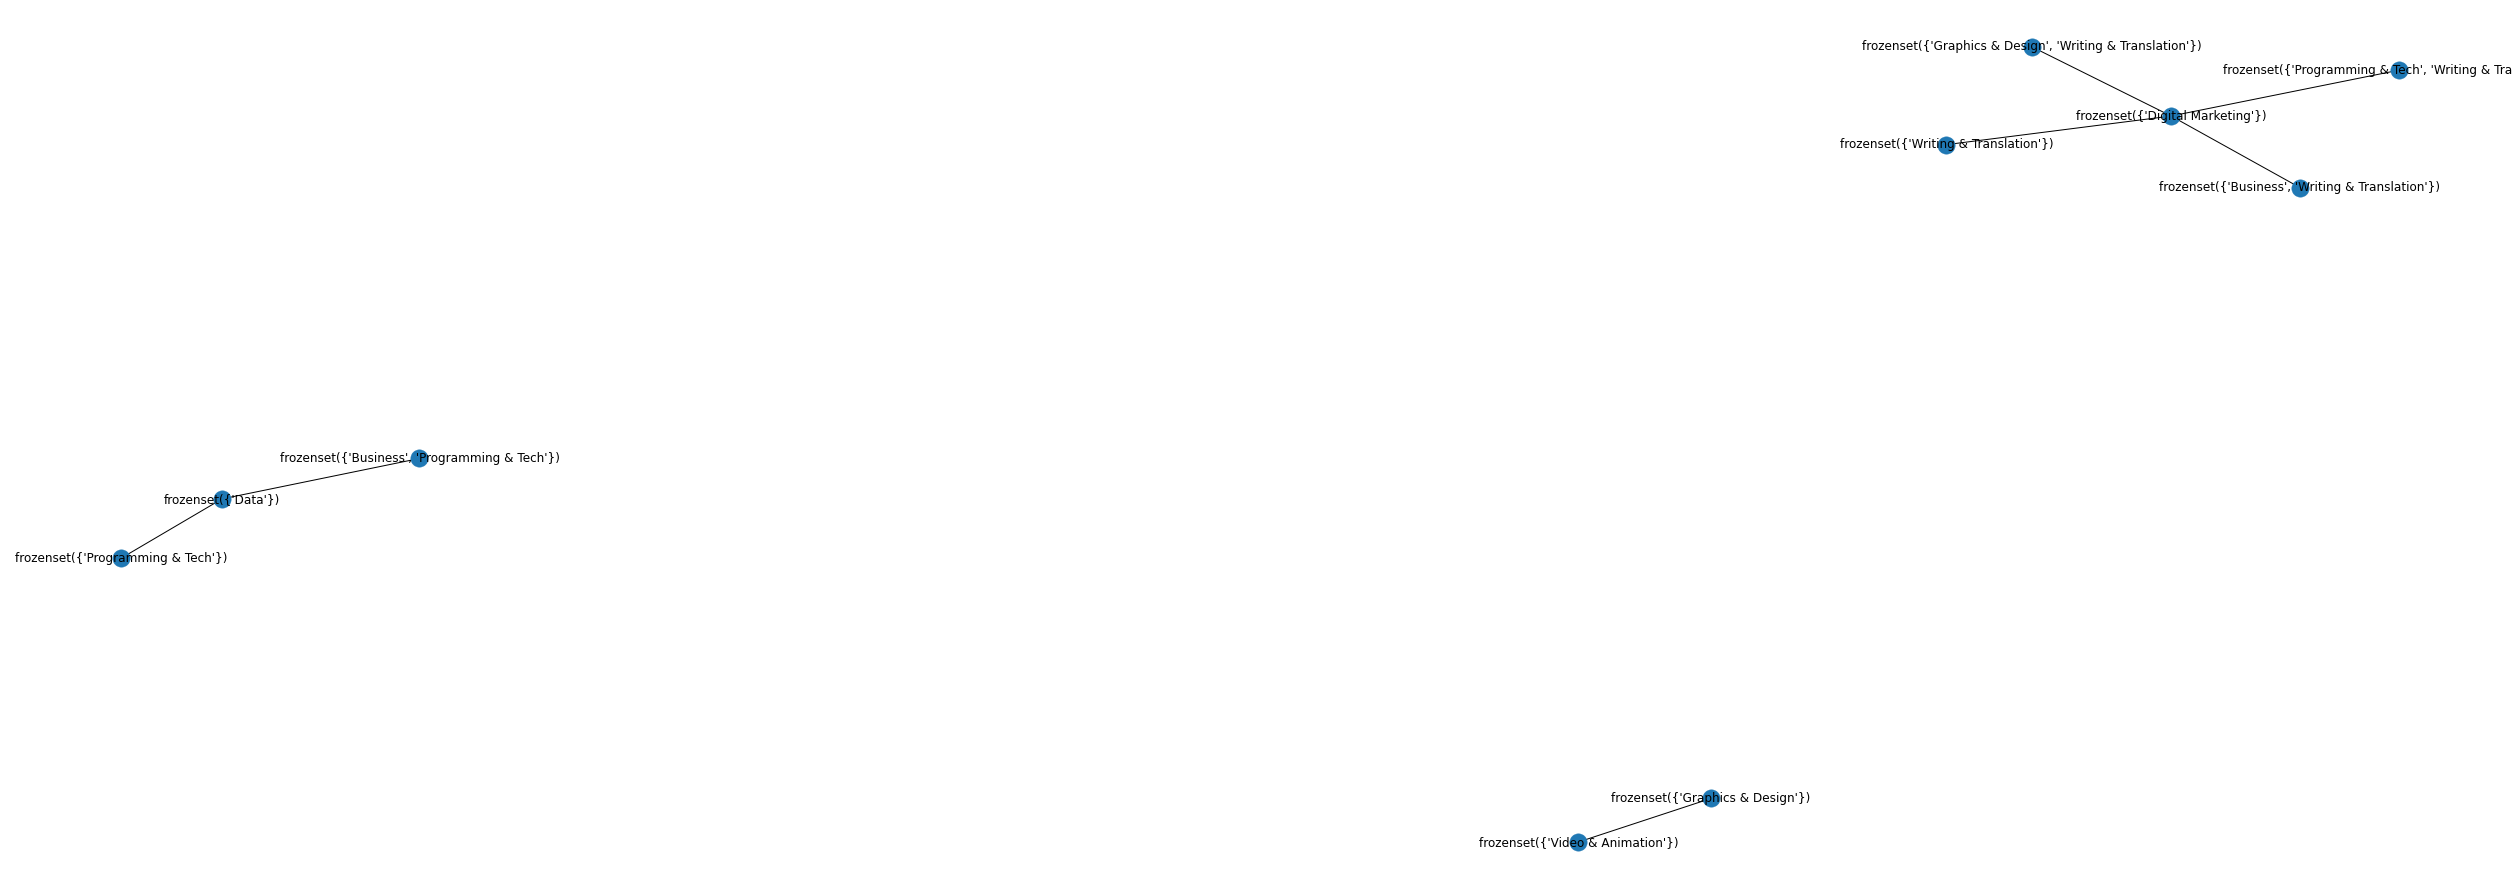

In [15]:
import networkx as nx
fig, ax=plt.subplots(figsize=(40,15))
GA=nx.from_pandas_edgelist(overal_association_rules,source='antecedents',target='consequents')
nx.draw(GA,with_labels=True)
plt.show()

In [16]:
overal_association_rules.sort_values('confidence', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,"(Business, Writing & Translation)",(Digital Marketing),0.052,0.374,0.032,0.615385,1.645413,0.012552,1.627600
6,"(Programming & Tech, Writing & Translation)",(Digital Marketing),0.058,0.374,0.034,0.586207,1.567398,0.012308,1.512833
5,"(Graphics & Design, Writing & Translation)",(Digital Marketing),0.052,0.374,0.030,0.576923,1.542575,0.010552,1.479636
2,(Video & Animation),(Graphics & Design),0.144,0.372,0.076,0.527778,1.418757,0.022432,1.329882
3,"(Business, Programming & Tech)",(Data),0.054,0.174,0.028,0.518519,2.979991,0.018604,1.715538
0,(Data),(Programming & Tech),0.174,0.390,0.088,0.505747,1.296788,0.020140,1.234186
1,(Writing & Translation),(Digital Marketing),0.218,0.374,0.110,0.504587,1.349164,0.028468,1.263593


In [17]:
#overal_association_rules.sort_values('lift', ascending=False)

# Sub Category Part

In [18]:
column_list_subcategory = []
for index, rows in dataset.iterrows():
    my_string = rows.Subcategory
    my_list = my_string.split(",")
    column_list_subcategory.append(my_list)
#print(column_list)

In [19]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
tran_encod = TransactionEncoder()
tran_encod_list = tran_encod.fit(column_list_subcategory).transform(column_list_subcategory)
transaction_df_subcat = pd.DataFrame(tran_encod_list, columns=tran_encod.columns_)
transaction_df_subcat.head()

,Ad Copy,Affiliate Marketing,Album Cover Design,Animated GIFs,Animation for Kids,Animation for Streamers,App & Website Previews,App Design,Architecture & Interior Design,Articles & Blog Posts,...,Web Traffic,Website Builders & CMS,Website Content,Website Design,Wellness,Whiteboard & Animated Explainers,WordPress,Wordpress,eLearning Content Development,eLearning Video Production
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [20]:
item_count = {}
for col in transaction_df_subcat.columns:
    item_count[col] = transaction_df_subcat[col].sum()
item_freq_df_subcat = pd.DataFrame(data=list(item_count.values()), index=list(item_count.keys()), columns=['frequency']).sort_values(by='frequency', ascending=False)
item_freq_df_subcat.shape, item_freq_df_subcat.head()

((176, 1),
                                   frequency
 Logo Design                             243
 WordPress                               225
 Social Media Marketing                  174
 Search Engine Optimization (SEO)        162
 Other                                   144)

(array([  0.,  50., 100., 150., 200., 250., 300.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

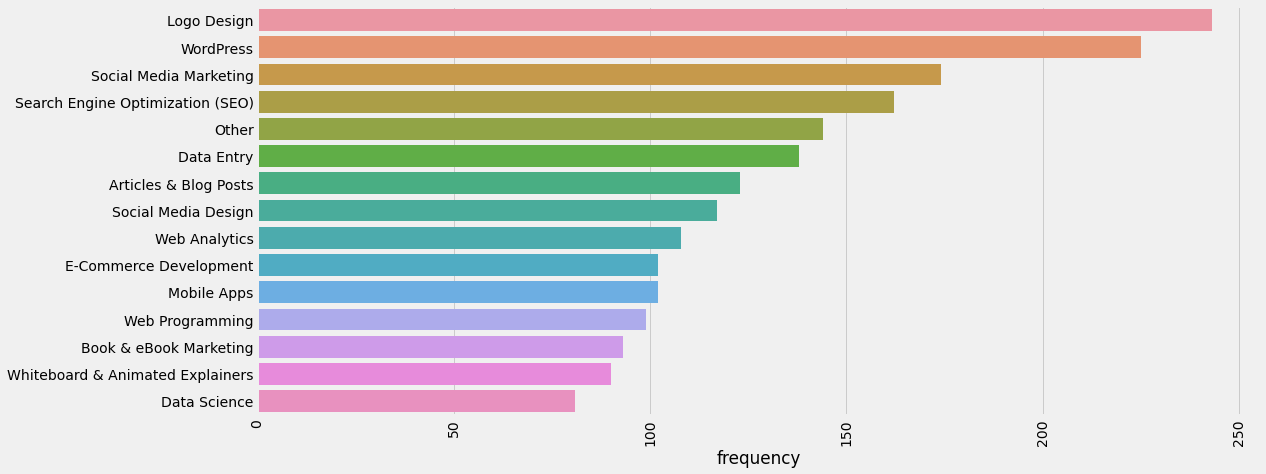

In [21]:
plt.figure(figsize=(16,7))
sns.barplot(y=item_freq_df_subcat.index[:15], x=item_freq_df_subcat.frequency[:15])
plt.xticks(rotation=90)

In [22]:
apriori(transaction_df_subcat, min_support=0.1, use_colnames=True)

,support,itemsets
0,0.162,(Logo Design)
1,0.108,(Search Engine Optimization (SEO))
2,0.116,(Social Media Marketing)
3,0.150,(WordPress)


In [23]:
print(f'freq>41: {item_freq_df_subcat[item_freq_df_subcat.frequency>41].shape[0]} items')
print(f'freq>30: {item_freq_df_subcat[item_freq_df_subcat.frequency>29].shape[0]} items')
print(f'freq>15: {item_freq_df_subcat[item_freq_df_subcat.frequency>15].shape[0]} items')

freq>41: 50 items
freq>30: 59 items
freq>15: 83 items


In [24]:
freq_itemset_support = apriori(transaction_df_subcat, min_support=0.02, use_colnames=True)
freq_itemset_support

,support,itemsets
0,0.028,(App Design)
1,0.082,(Articles & Blog Posts)
2,0.062,(Book & eBook Marketing)
3,0.030,(Book & eBook Writing)
4,0.042,(Book Design)
...,...,...
75,0.022,"(Whiteboard & Animated Explainers, Short Video..."
76,0.020,"(Social Media Design, Social Media Marketing)"
77,0.024,"(Social Media Marketing, WordPress)"
78,0.026,"(Web Programming, WordPress)"


In [25]:
overal_association_rules = association_rules(freq_itemset_support, metric="confidence", min_threshold=0.50)
overal_association_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Website Content),(Articles & Blog Posts),0.036,0.082,0.022,0.611111,7.452575,0.019048,2.360571
1,(Brand Style Guides),(Logo Design),0.050,0.162,0.046,0.920000,5.679012,0.037900,10.475000
2,(Brochure Design),(Flyer Design),0.032,0.054,0.026,0.812500,15.046296,0.024272,5.045333
3,(Business Cards & Stationery),(Logo Design),0.040,0.162,0.024,0.600000,3.703704,0.017520,2.095000
4,(Sales),(Data Entry),0.034,0.092,0.026,0.764706,8.312020,0.022872,3.859000
5,(Virtual Assistant),(Data Entry),0.052,0.092,0.032,0.615385,6.688963,0.027216,2.360800
6,(Data Visualization),(Data Science),0.034,0.054,0.020,0.588235,10.893246,0.018164,2.297429
7,(E-Commerce Development),(WordPress),0.068,0.150,0.034,0.500000,3.333333,0.023800,1.700000
8,(Flyer Design),(Logo Design),0.054,0.162,0.032,0.592593,3.657979,0.023252,2.056909
9,(Flyer Design),(Social Media Design),0.054,0.078,0.028,0.518519,6.647673,0.023788,1.914923


In [26]:
#overal_association_rules = association_rules(freq_itemset_support, metric="lift", min_threshold=1.0)
#overal_association_rules

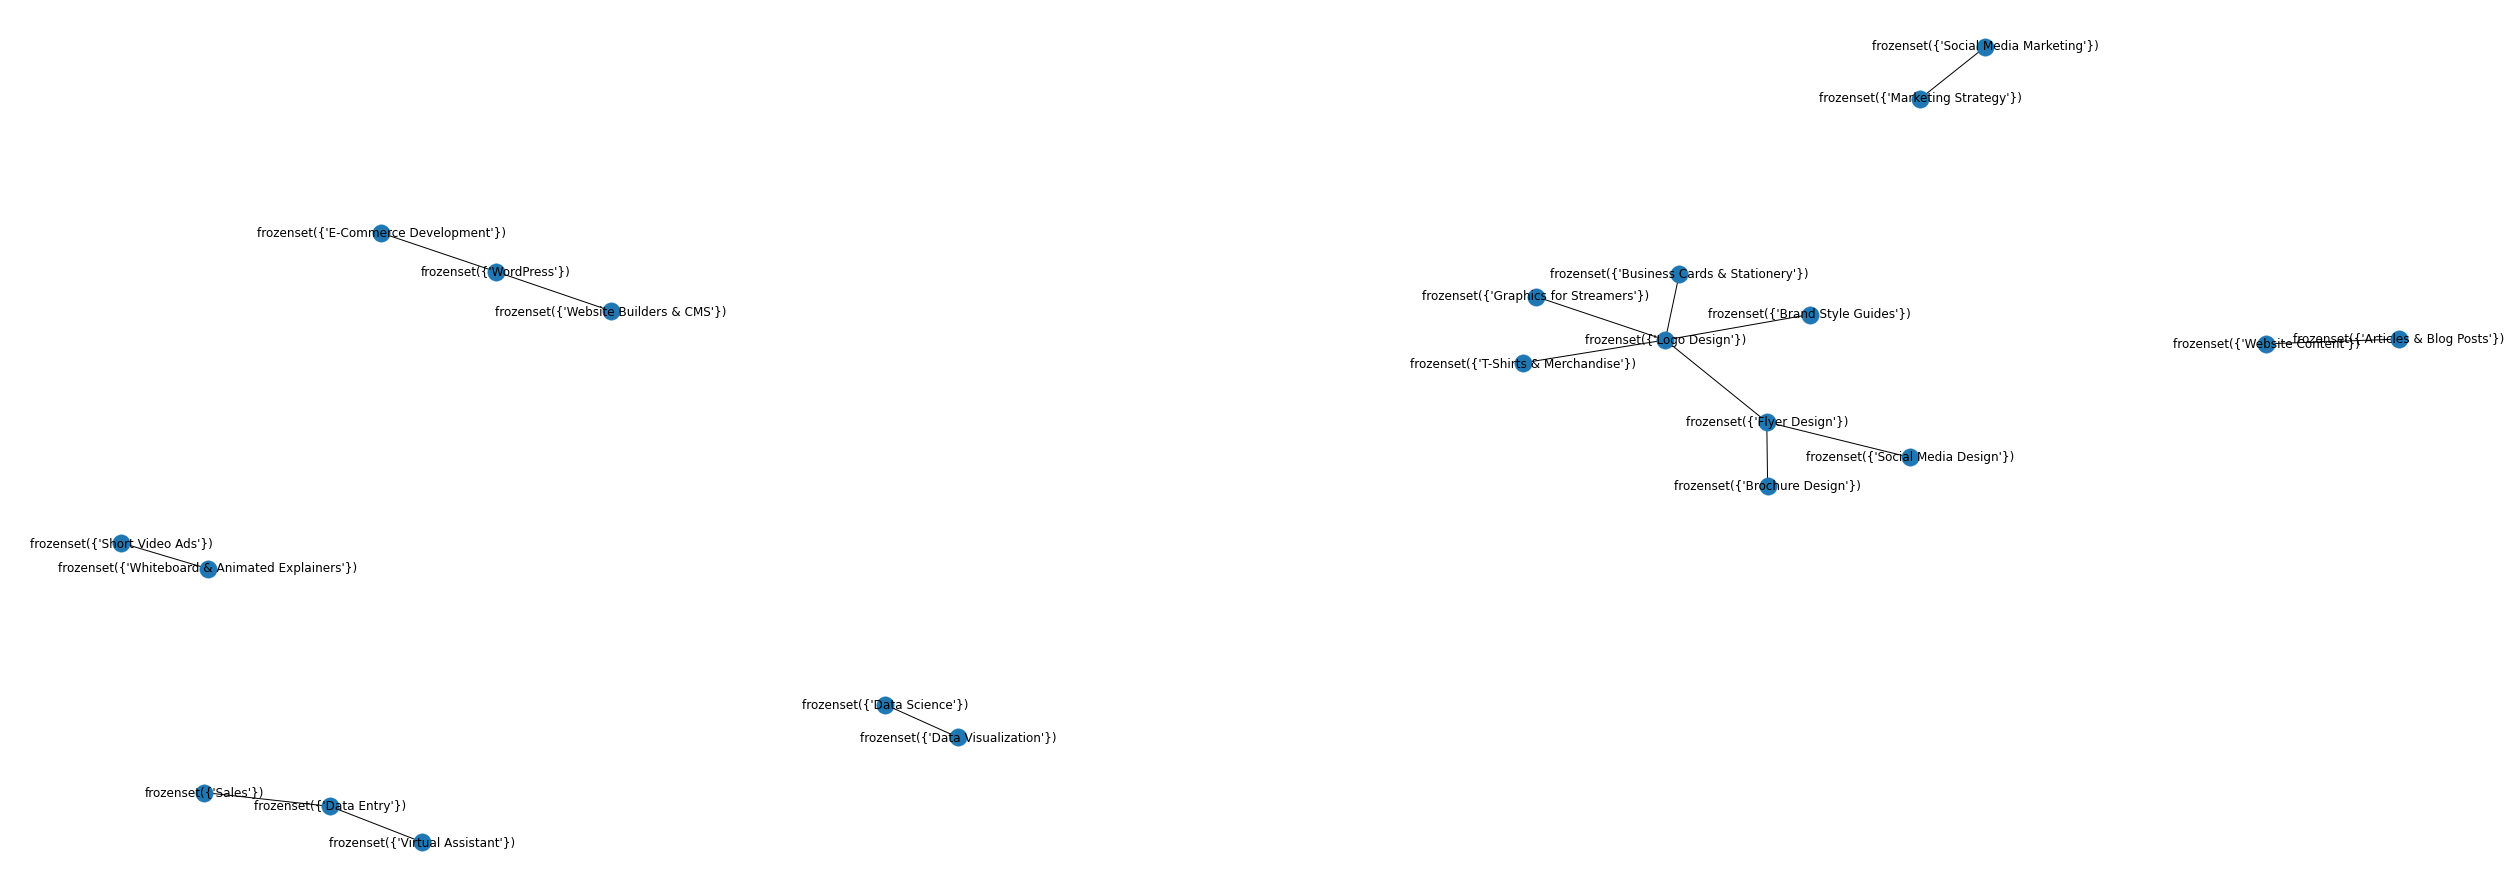

In [27]:
import networkx as nx
fig, ax=plt.subplots(figsize=(40,15))
GA=nx.from_pandas_edgelist(overal_association_rules,source='antecedents',target='consequents')
nx.draw(GA,with_labels=True)
plt.show()

In [28]:
overal_association_rules.sort_values('confidence', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(Brand Style Guides),(Logo Design),0.050,0.162,0.046,0.920000,5.679012,0.037900,10.475000
2,(Brochure Design),(Flyer Design),0.032,0.054,0.026,0.812500,15.046296,0.024272,5.045333
4,(Sales),(Data Entry),0.034,0.092,0.026,0.764706,8.312020,0.022872,3.859000
11,(T-Shirts & Merchandise),(Logo Design),0.028,0.162,0.020,0.714286,4.409171,0.015464,2.933000
10,(Graphics for Streamers),(Logo Design),0.032,0.162,0.022,0.687500,4.243827,0.016816,2.681600
14,(Website Builders & CMS),(WordPress),0.034,0.150,0.022,0.647059,4.313725,0.016900,2.408333
5,(Virtual Assistant),(Data Entry),0.052,0.092,0.032,0.615385,6.688963,0.027216,2.360800
0,(Website Content),(Articles & Blog Posts),0.036,0.082,0.022,0.611111,7.452575,0.019048,2.360571
13,(Short Video Ads),(Whiteboard & Animated Explainers),0.036,0.060,0.022,0.611111,10.185185,0.019840,2.417143
3,(Business Cards & Stationery),(Logo Design),0.040,0.162,0.024,0.600000,3.703704,0.017520,2.095000


In [29]:
#overal_association_rules.sort_values('lift', ascending=False)

# Pricing_Sales Relations

In [30]:
dataset_1 = pd.read_excel('G:/4-1 Thesis/last.xlsx')

In [31]:
dataset_1.head()

,Category,Subcat,price,price_cat,sales,sales_cat,stars,stars_cat
0,Programming & Tech,Data Analysis & Reports,155,price between 105 to 500,10,Sales Less Than 10,5.0,Five
1,Lifestyle,Greeting Cards & Videos,5,Five USD,1000,Sales above 100,5.0,Five
2,Programming & Tech,Website Builders & CMS,75,price between 55 to 100,68,Sales between 51 to 100,5.0,Five
3,Lifestyle,Cooking Lessons,20,price_between 15 to 20,5,Sales Less Than 10,4.9,Four+
4,Writing & Translation,Legal Writing,10,Ten USD,2,Sales Less Than 10,5.0,Five


In [32]:
#np.random.seed(0)
#df = pd.DataFrame({"a": np.random.random_integers(1, high=100, size=6183)})
#ranges = [0,5,10,20,30,50,100,500,10000]
#df.groupby(pd.cut(dataset_1.sales_cat, ranges)).count()

In [33]:
column_list = []
for index, rows in dataset_1.iterrows():
    my_list = [rows.Category,rows.price_cat,rows.sales_cat]
    column_list.append(my_list)
#print(column_list)

In [34]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
tran_encod = TransactionEncoder()
tran_encod_list = tran_encod.fit(column_list).transform(column_list)
transaction_df = pd.DataFrame(tran_encod_list, columns=tran_encod.columns_)
transaction_df.head()

,Business,Digital Marketing,Five USD,Lifestyle,Music & Audio,Programming & Tech,Sales Between 21 to 50,Sales Less Than 10,Sales above 100,Sales between 11 to 20,Sales between 51 to 100,Ten USD,Video & Animation,Writing & Translation,price above 500,price between 105 to 500,price between 25 to 30,price between 35 to 50,price between 55 to 100,price_between 15 to 20
0,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,True,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False
3,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False


In [35]:
item_count = {}
for col in transaction_df.columns:
    item_count[col] = transaction_df[col].sum()
item_freq_df = pd.DataFrame(data=list(item_count.values()), index=list(item_count.keys()), columns=['frequency']).sort_values(by='frequency', ascending=False)
item_freq_df.shape, item_freq_df.tail(15)

((20, 1),
                           frequency
 Five USD                        986
 Sales Between 21 to 50          911
 price between 55 to 100         890
 Ten USD                         886
 price between 35 to 50          883
 Lifestyle                       864
 Programming & Tech              807
 price between 105 to 500        791
 Music & Audio                   768
 Sales between 11 to 20          736
 Business                        720
 price between 25 to 30          668
 Sales between 51 to 100         555
 Digital Marketing               336
 price above 500                  85)

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

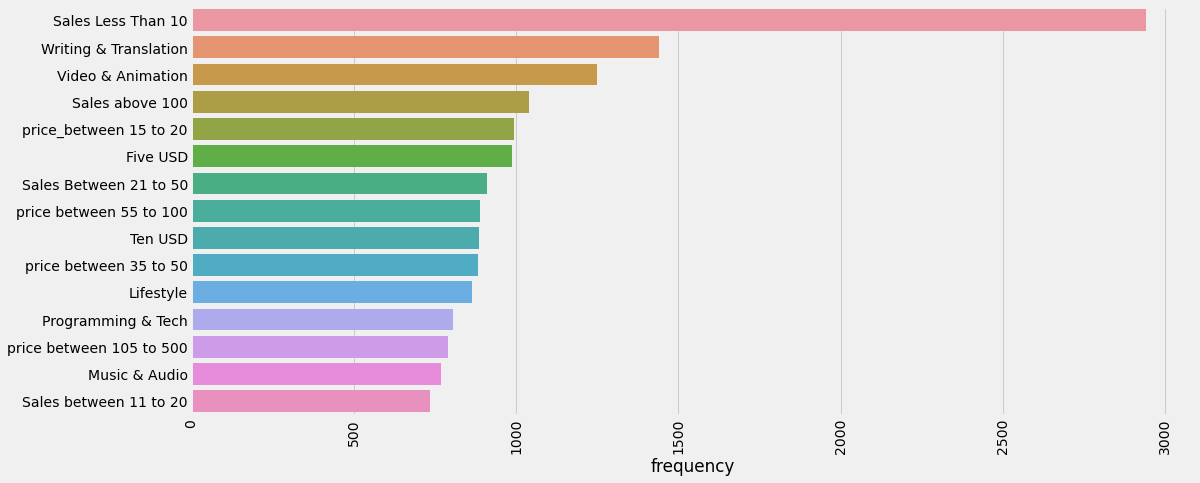

In [36]:
plt.figure(figsize=(16,7))
sns.barplot(y=item_freq_df.index[:15], x=item_freq_df.frequency[:15])
plt.xticks(rotation=90)

In [37]:
apriori(transaction_df, min_support=0.0067, use_colnames=True)

,support,itemsets
0,0.116448,(Business)
1,0.054343,(Digital Marketing)
2,0.159470,(Five USD)
3,0.139738,(Lifestyle)
4,0.124212,(Music & Audio)
...,...,...
169,0.023613,"(Sales Less Than 10, Writing & Translation, pr..."
170,0.008572,"(Sales above 100, Video & Animation, price bet..."
171,0.008248,"(Sales above 100, Video & Animation, price bet..."
172,0.007278,"(Sales above 100, price between 55 to 100, Vid..."


In [38]:
print(f'freq>30: {item_freq_df[item_freq_df.frequency>47].shape[0]} items')
print(f'freq>20: {item_freq_df[item_freq_df.frequency>24].shape[0]} items')
print(f'freq>12: {item_freq_df[item_freq_df.frequency>12].shape[0]} items')

freq>30: 20 items
freq>20: 20 items
freq>12: 20 items


In [39]:
freq_itemset_support = apriori(transaction_df, min_support=0.005, use_colnames=True)
freq_itemset_support

,support,itemsets
0,0.116448,(Business)
1,0.054343,(Digital Marketing)
2,0.159470,(Five USD)
3,0.139738,(Lifestyle)
4,0.124212,(Music & Audio)
...,...,...
190,0.005014,"(Sales above 100, price between 105 to 500, Wr..."
191,0.005337,"(Sales above 100, Writing & Translation, price..."
192,0.007925,"(Sales above 100, price between 55 to 100, Wri..."
193,0.005337,"(Sales between 11 to 20, Writing & Translation..."


In [40]:
from mlxtend.frequent_patterns import apriori

apriori(transaction_df, min_support=0.005, use_colnames=True)

,support,itemsets
0,0.116448,(Business)
1,0.054343,(Digital Marketing)
2,0.159470,(Five USD)
3,0.139738,(Lifestyle)
4,0.124212,(Music & Audio)
...,...,...
190,0.005014,"(Sales above 100, price between 105 to 500, Wr..."
191,0.005337,"(Sales above 100, Writing & Translation, price..."
192,0.007925,"(Sales above 100, price between 55 to 100, Wri..."
193,0.005337,"(Sales between 11 to 20, Writing & Translation..."


In [41]:
rules = association_rules(freq_itemset_support, metric="confidence", min_threshold=0.40)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Business),(Sales Less Than 10),0.116448,0.475497,0.054504,0.468056,0.984349,-0.000867,0.986010
1,(Digital Marketing),(Sales Less Than 10),0.054343,0.475497,0.022481,0.413690,0.870016,-0.003359,0.894583
2,(Five USD),(Sales Less Than 10),0.159470,0.475497,0.096070,0.602434,1.266956,0.020243,1.319285
3,(Lifestyle),(Sales Less Than 10),0.139738,0.475497,0.078764,0.563657,1.185406,0.012319,1.202043
4,(Music & Audio),(Sales Less Than 10),0.124212,0.475497,0.051593,0.415365,0.873537,-0.007469,0.897145
5,(Programming & Tech),(Sales Less Than 10),0.130519,0.475497,0.060488,0.463445,0.974653,-0.001573,0.977537
6,(Ten USD),(Sales Less Than 10),0.143296,0.475497,0.076015,0.530474,1.115619,0.007878,1.117090
7,(Video & Animation),(Sales Less Than 10),0.201844,0.475497,0.089115,0.441506,0.928515,-0.006861,0.939138
8,(Writing & Translation),(Sales Less Than 10),0.232897,0.475497,0.118551,0.509028,1.070517,0.007809,1.068294
9,(price above 500),(Sales Less Than 10),0.013747,0.475497,0.008895,0.647059,1.360804,0.002359,1.486091


In [42]:
rules["antecedent_len"] = rules["antecedents"].apply(lambda x: len(x))
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
0,(Business),(Sales Less Than 10),0.116448,0.475497,0.054504,0.468056,0.984349,-0.000867,0.986010,1
1,(Digital Marketing),(Sales Less Than 10),0.054343,0.475497,0.022481,0.413690,0.870016,-0.003359,0.894583,1
2,(Five USD),(Sales Less Than 10),0.159470,0.475497,0.096070,0.602434,1.266956,0.020243,1.319285,1
3,(Lifestyle),(Sales Less Than 10),0.139738,0.475497,0.078764,0.563657,1.185406,0.012319,1.202043,1
4,(Music & Audio),(Sales Less Than 10),0.124212,0.475497,0.051593,0.415365,0.873537,-0.007469,0.897145,1
5,(Programming & Tech),(Sales Less Than 10),0.130519,0.475497,0.060488,0.463445,0.974653,-0.001573,0.977537,1
6,(Ten USD),(Sales Less Than 10),0.143296,0.475497,0.076015,0.530474,1.115619,0.007878,1.117090,1
7,(Video & Animation),(Sales Less Than 10),0.201844,0.475497,0.089115,0.441506,0.928515,-0.006861,0.939138,1
8,(Writing & Translation),(Sales Less Than 10),0.232897,0.475497,0.118551,0.509028,1.070517,0.007809,1.068294,1
9,(price above 500),(Sales Less Than 10),0.013747,0.475497,0.008895,0.647059,1.360804,0.002359,1.486091,1


In [43]:
rules[ (rules['antecedent_len'] >= 2) &
       (rules['confidence'] > 0.4) &
       (rules['lift'] > 1.0) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
15,"(Business, Ten USD)",(Sales Less Than 10),0.013424,0.475497,0.006631,0.493976,1.038862,0.000248,1.036517,2
16,"(Business, price between 105 to 500)",(Sales Less Than 10),0.016012,0.475497,0.007925,0.494949,1.040909,0.000311,1.038515,2
19,"(Business, price_between 15 to 20)",(Sales Less Than 10),0.019246,0.475497,0.009704,0.504202,1.060367,0.000552,1.057895,2
20,"(Lifestyle, Five USD)",(Sales Less Than 10),0.045447,0.475497,0.031700,0.697509,1.466904,0.010090,1.733944,2
21,"(Lifestyle, Sales Less Than 10)",(Five USD),0.078764,0.159470,0.031700,0.402464,2.523768,0.019139,1.406661,2
22,"(Five USD, Music & Audio)",(Sales Less Than 10),0.017629,0.475497,0.010027,0.568807,1.196237,0.001645,1.216400,2
23,"(Programming & Tech, Five USD)",(Sales Less Than 10),0.016820,0.475497,0.008895,0.528846,1.112196,0.000897,1.113230,2
24,"(Video & Animation, Five USD)",(Sales Less Than 10),0.024422,0.475497,0.014556,0.596026,1.253480,0.002944,1.298359,2
25,"(Five USD, Writing & Translation)",(Sales Less Than 10),0.034611,0.475497,0.020702,0.598131,1.257906,0.004244,1.305158,2
26,"(Ten USD, Lifestyle)",(Sales Less Than 10),0.033641,0.475497,0.017791,0.528846,1.112196,0.001795,1.113230,2


# Overal_Corelation for Pricing,Sales and Stars

In [44]:
df = pd.read_excel('G:/4-1 Thesis/last.xlsx')

In [45]:
correlation_df = dataset_1.corr()

In [46]:
print(correlation_df)

        price     sales     stars
price  1.0000 -0.023400 -0.101200
sales -0.0234  1.000000  0.122465
stars -0.1012  0.122465  1.000000


# Co-relation of each category separatley

In [47]:
i=1
for categ in dataset_1['Category'].unique():
    print(str(i)+' - '+str(categ))
    i=i+1

1 - Programming & Tech
2 - Lifestyle
3 - Writing & Translation
4 - Digital Marketing
5 - Video & Animation
6 - Music & Audio
7 - Business


In [48]:
df_1 = df[df['Category'] == 'Programming & Tech']
df_2 = df[df['Category'] == 'Lifestyle']
df_3 = df[df['Category'] == 'Writing & Translation']
df_4 = df[df['Category'] == 'Digital Marketing']
df_5 = df[df['Category'] == 'Video & Animation']
df_6 = df[df['Category'] == 'Music & Audio']
df_7 = df[df['Category'] == 'Business']

# Programming & Tech

In [49]:
correlation_df_1 = df_1.corr()
print(correlation_df_1)

          price     sales     stars
price  1.000000 -0.047587 -0.194150
sales -0.047587  1.000000  0.148159
stars -0.194150  0.148159  1.000000


# Lifestyle

In [50]:
correlation_df_2 = df_2.corr()
print(correlation_df_2)

          price     sales     stars
price  1.000000  0.073957  0.051180
sales  0.073957  1.000000  0.090887
stars  0.051180  0.090887  1.000000


# Writing & Translation

In [51]:
correlation_df_3 = df_3.corr()
print(correlation_df_3)

          price     sales     stars
price  1.000000 -0.018720 -0.058871
sales -0.018720  1.000000  0.116646
stars -0.058871  0.116646  1.000000


# Digital Marketing

In [52]:
correlation_df_4 = df_4.corr()
print(correlation_df_4)

          price     sales     stars
price  1.000000 -0.090159 -0.042002
sales -0.090159  1.000000  0.141554
stars -0.042002  0.141554  1.000000


# Video & Animation

In [53]:
correlation_df_5 = df_5.corr()
print(correlation_df_5)

          price     sales     stars
price  1.000000 -0.041246 -0.089540
sales -0.041246  1.000000  0.141531
stars -0.089540  0.141531  1.000000


# Music & Audio

In [54]:
correlation_df_6 = df_6.corr()
print(correlation_df_6)

          price     sales     stars
price  1.000000 -0.015457 -0.061822
sales -0.015457  1.000000  0.112850
stars -0.061822  0.112850  1.000000


# Business

In [55]:
correlation_df_7 = df_7.corr()
print(correlation_df_7)

          price     sales     stars
price  1.000000 -0.008695 -0.117306
sales -0.008695  1.000000  0.111292
stars -0.117306  0.111292  1.000000
